In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek

# Load dataset
df = pd.read_csv(r"C:\Users\Joshua.Mahada\Downloads\heart-attack-risk-prediction-dataset.csv")

# Display first few rows
df.head()



,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Heart Attack Risk (Text),Gender,Systolic blood pressure,Diastolic blood pressure
0,0.595506,0.314286,0.047663,0.0,0.0,1.0,0.0,0.0,0.208326,0,...,0.0,0.333333,0.0,0.227018,0.048229,0.036512,0,Male,0.600000,0.534884
1,0.595506,0.096429,0.047663,1.0,1.0,1.0,1.0,1.0,0.752420,1,...,2.0,0.666667,0.0,0.227018,0.048229,0.036512,0,Male,0.574194,0.569767
2,0.595506,0.189286,0.047663,0.0,0.0,1.0,0.0,1.0,0.200998,2,...,4.0,1.000000,0.0,0.227018,0.048229,0.036512,0,Male,0.187097,0.674419
3,0.078652,0.960714,0.071494,1.0,1.0,1.0,1.0,1.0,0.090557,2,...,1.0,0.500000,0.0,0.227018,0.048229,0.036512,0,Male,0.645161,0.593023
4,0.078652,0.792857,0.071494,1.0,0.0,1.0,1.0,0.0,0.601030,2,...,1.0,0.166667,0.0,0.227018,0.048229,0.036512,0,Male,0.251613,0.383721


C:\Users\Joshua.Mahada\AppData\Local\Temp\ipykernel_3820\133774977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Heart Attack Risk (Binary)", data=df, palette=["blue", "red"])


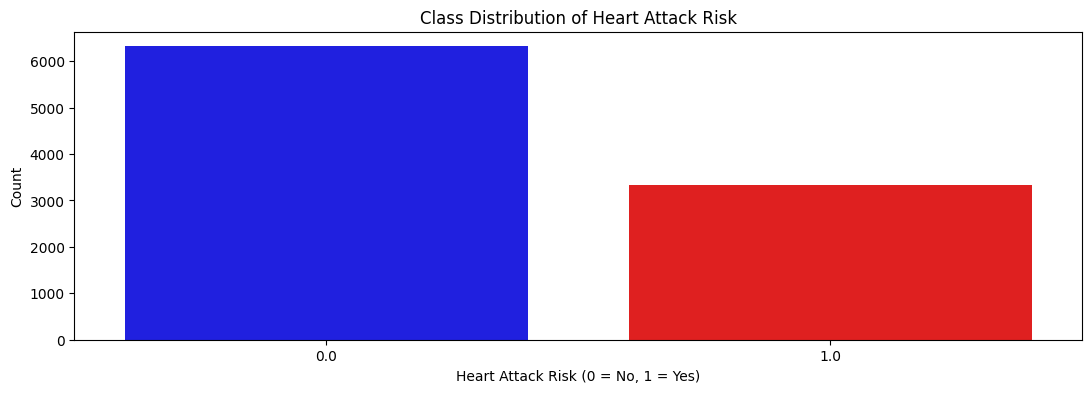

In [50]:
plt.figure(figsize=(13, 4))
sns.countplot(x="Heart Attack Risk (Binary)", data=df, palette=["blue", "red"])
plt.xlabel("Heart Attack Risk (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Class Distribution of Heart Attack Risk")
plt.show()


In [52]:
# Handle missing values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])  # Fill categorical with mode
    else:
        df[column] = df[column].fillna(df[column].median())  # Fill numerical with median

# Verify if missing values are handled
df.isnull().sum()


Age                                0
Cholesterol                        0
Heart rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk (Binary)         0
Blood sugar                        0
CK-MB                              0
Troponin                           0
Heart Attack Risk (Text)           0
Gender                             0
Systolic blood pressure            0
Diastolic blood pressure           0
d

In [53]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Display the updated dataset structure
df.head()


,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Heart Attack Risk (Text),Systolic blood pressure,Diastolic blood pressure,Gender_1.0,Gender_Female,Gender_Male
0,0.595506,0.314286,0.047663,0.0,0.0,1.0,0.0,0.0,0.208326,0,...,0.0,0.227018,0.048229,0.036512,0,0.600000,0.534884,False,False,True
1,0.595506,0.096429,0.047663,1.0,1.0,1.0,1.0,1.0,0.752420,1,...,0.0,0.227018,0.048229,0.036512,0,0.574194,0.569767,False,False,True
2,0.595506,0.189286,0.047663,0.0,0.0,1.0,0.0,1.0,0.200998,2,...,0.0,0.227018,0.048229,0.036512,0,0.187097,0.674419,False,False,True
3,0.078652,0.960714,0.071494,1.0,1.0,1.0,1.0,1.0,0.090557,2,...,0.0,0.227018,0.048229,0.036512,0,0.645161,0.593023,False,False,True
4,0.078652,0.792857,0.071494,1.0,0.0,1.0,1.0,0.0,0.601030,2,...,0.0,0.227018,0.048229,0.036512,0,0.251613,0.383721,False,False,True


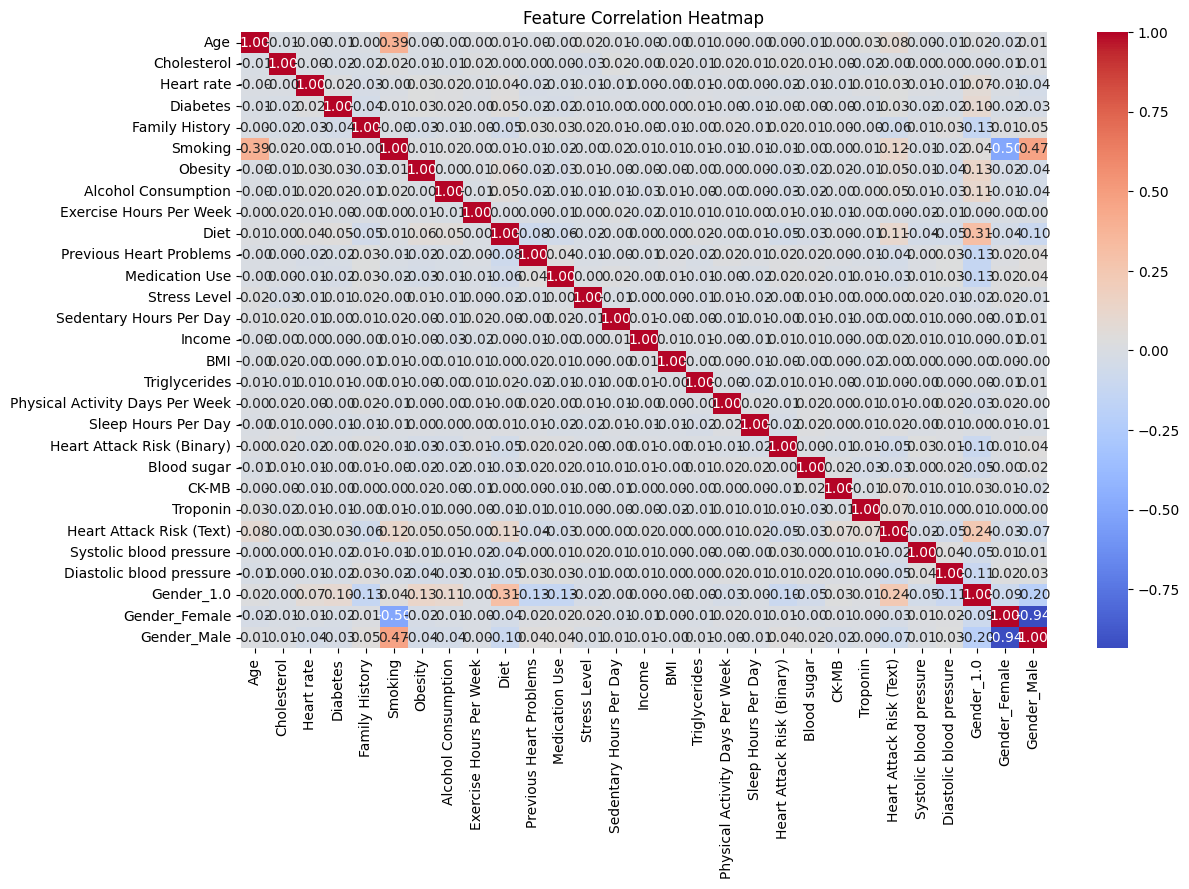

In [54]:
plt.figure(figsize=(13, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


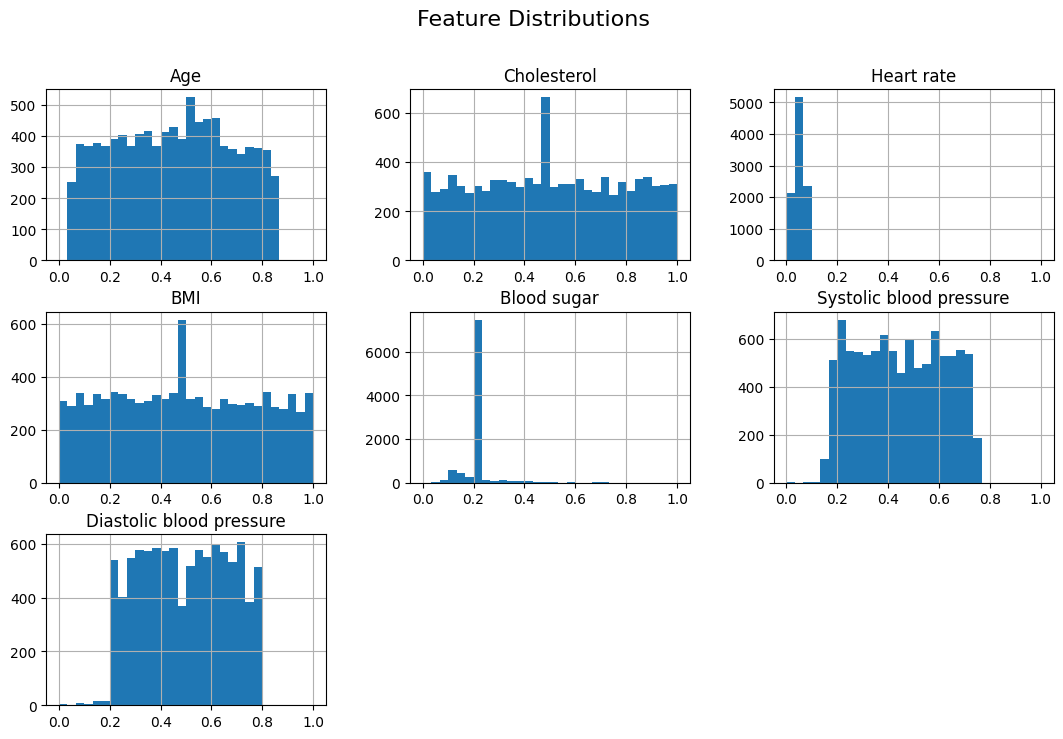

In [57]:
features_to_plot = ["Age", "Cholesterol", "Heart rate", "BMI", "Blood sugar", "Systolic blood pressure", "Diastolic blood pressure"]

df[features_to_plot].hist(figsize=(13, 8), bins=30, layout=(3, 3))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


In [58]:
# Define target column
target_column = "Heart Attack Risk (Binary)"

# Select features (remove the text-based heart attack risk column)
X = df.drop(columns=[target_column, "Heart Attack Risk (Text)"])
y = df[target_column]

# Print dataset shape
print("Feature Set Shape:", X.shape)
print("Target Variable Shape:", y.shape)


Feature Set Shape: (9651, 27)
Target Variable Shape: (9651,)


In [59]:
# Apply SMOTETomek to balance dataset
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Print new class distribution
print("Balanced Class Distribution:\n", pd.Series(y_resampled).value_counts())


Balanced Class Distribution:
 Heart Attack Risk (Binary)
0.0    6049
1.0    6049
Name: count, dtype: int64


In [60]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Print new dataset shapes
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (9678, 27)
Testing Data Shape: (2420, 27)


In [61]:
# Apply feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display scaled dataset
X_train[:5]


array([[-1.55763375e-01,  1.32960633e+00,  1.05508055e+00,
         7.16064905e-01, -9.63694049e-01,  3.26543506e-01,
         9.95688589e-01, -1.28384420e+00,  1.69547301e-03,
         1.14528259e+00, -6.63349557e-01, -9.85539743e-01,
        -8.23289837e-01,  3.53257961e-01, -2.62029473e-01,
        -2.24546590e-01,  1.28981728e+00,  1.40241724e-01,
        -1.14180710e+00, -2.24762931e-01,  2.19250349e-02,
        -9.26742134e-02, -1.39361355e+00, -1.19196664e+00,
        -1.25471403e-01,  1.54284485e+00, -1.48802371e+00],
       [-7.47806967e-01,  6.40940686e-01, -1.12593755e+00,
        -1.44069695e+00,  1.06800667e+00,  3.26543506e-01,
        -6.98187919e-01,  4.60076344e-01,  1.60714754e+00,
         1.14528259e+00, -9.87128046e-01, -9.85539743e-01,
        -1.70140239e-01, -7.13714415e-01,  6.83929401e-01,
        -1.06109726e+00,  1.49207543e+00,  1.09468848e+00,
         1.22200462e+00,  2.25634569e-03,  1.18609390e-02,
         7.67169036e-03,  3.89881912e-01,  1.23501075e+

In [62]:
# Define hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform Grid Search for optimal parameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb = grid_search.best_estimator_

# Print best hyperparameters
print("Best XGBoost Parameters:", grid_search.best_params_)


Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}


In [63]:
# Predict on test set
y_pred_xgb = best_xgb.predict(X_test)

# Display classification report
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Display model accuracy
print("XGBoost Model Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.85      0.78      1210
         1.0       0.81      0.66      0.73      1210

    accuracy                           0.75      2420
   macro avg       0.76      0.75      0.75      2420
weighted avg       0.76      0.75      0.75      2420

XGBoost Model Accuracy: 0.7545454545454545


In [ ]:
# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Display classification report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Display model accuracy
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))


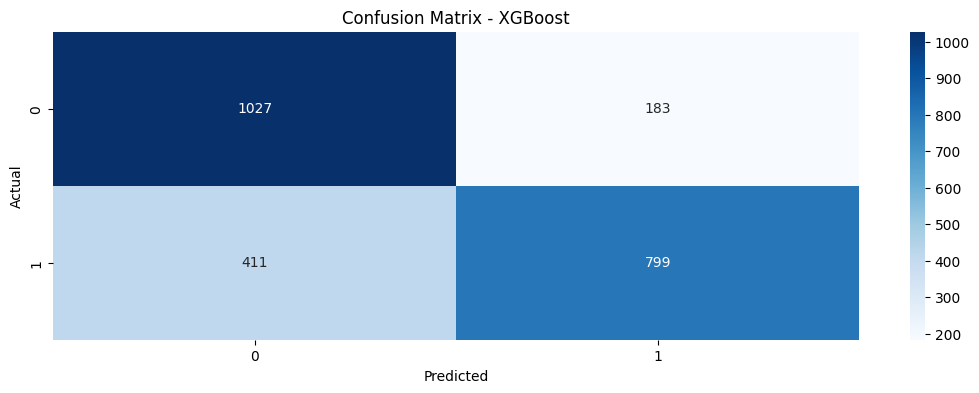

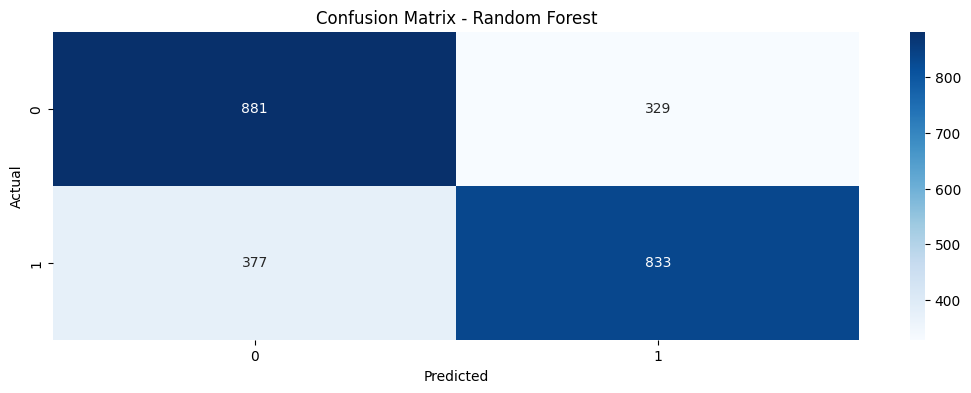

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    plt.figure(figsize=(13, 4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
